In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
red_wine_df = pd.read_csv('winequality_red.csv', sep=';')
white_wine_df = pd.read_csv('winequality_white.csv', sep=';')

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [30]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [32]:
df = pd.concat([red_wine_df, white_wine_df])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Preprocessing

In [33]:
df['wine_type'] = df['wine_type'].apply(lambda x: 0 if x == 'red' else 1)

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully preprocessed for a regression task.")
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

Data has been successfully preprocessed for a regression task.
X_train shape: (5197, 12)
y_train shape: (5197,)


In [34]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Correlation between the attributes
### Heatmap:

In [35]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

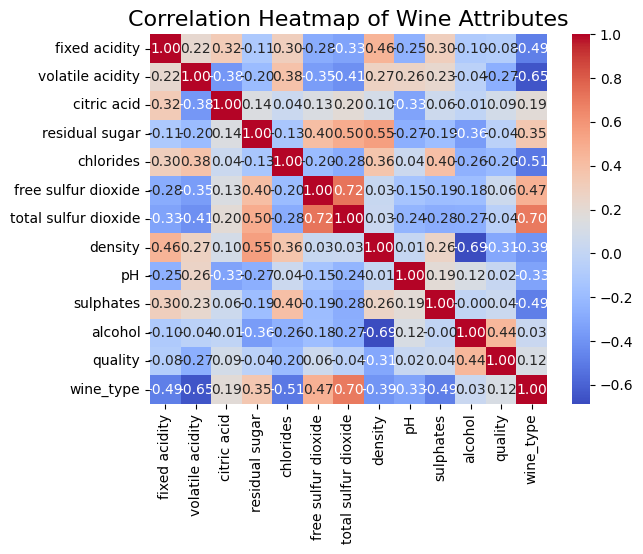

In [36]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Attributes', fontsize=16)
plt.show()

### Analysis:
**Strongest Predictor of Quality**:

alcohol has the strongest positive correlation with both quality (0.44) and quality_category (0.36). This is the single most influential feature for predicting a wine's quality rating.

**Strong Negative Predictors**:

density has the strongest negative correlation with quality (-0.31). This is expected, as density and alcohol are strongly negatively correlated (-0.69); wines with more alcohol are less dense and rated higher. Volatile acidity also shows a notable negative correlation with quality (-0.27).

**High Multicollinearity**:

There is a very strong positive correlation between free sulfur dioxide and total sulfur dioxide (0.72). This indicates they carry redundant information.

- The high correlation (0.72) between free sulfur dioxide and total sulfur dioxide makes them redundant and one of them can be safely removed.
- The acidity-related features (fixed acidity, pH, citric acid) are all moderately inter-correlated. PCA can transform these acidity variables into one or two new features, often called "acidity components," that capture the most important information from the original features. This reduces the number of features while preserving the underlying information.

## Feature Selection from Heatmap Analysis
The correlation between free sulfur dioxide and total sulfur dioxide (0.72) is high. They provide very similar information to the model. Hence, one of them can be removed.

To find which among the two to remove, training two same models keeping only one of them and comparing the results:

In [37]:
X = df.drop(['quality'], axis=1)
y = df['quality']

## Model A: Dropping free sulfur dioxide

In [38]:
X_A = X.drop('free sulfur dioxide', axis=1)

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y, test_size=0.2, random_state=42)

scaler_A = StandardScaler()
X_train_A_scaled = scaler_A.fit_transform(X_train_A)
X_test_A_scaled = scaler_A.transform(X_test_A)

model_A = RandomForestClassifier(random_state=42)
model_A.fit(X_train_A_scaled, y_train_A)
y_pred_A = model_A.predict(X_test_A_scaled)


class_names = [str(i) for i in np.unique(y)]

print("Results for Model A (Multi-class Classification):")
print(classification_report(y_test_A, y_pred_A, target_names=class_names))

Results for Model A (Multi-class Classification):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.55      0.14      0.22        43
           5       0.67      0.72      0.69       402
           6       0.67      0.75      0.71       597
           7       0.71      0.57      0.63       215
           8       0.93      0.36      0.52        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.50      0.36      0.40      1300
weighted avg       0.67      0.68      0.67      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model B: Dropping total sulfur dioxide

In [39]:
X_B = X.drop('total sulfur dioxide', axis=1)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y, test_size=0.2, random_state=42)

scaler_B = StandardScaler()
X_train_B_scaled = scaler_B.fit_transform(X_train_B)
X_test_B_scaled = scaler_B.transform(X_test_B)

model_B = RandomForestClassifier(random_state=42)
model_B.fit(X_train_B_scaled, y_train_B)
y_pred_B = model_B.predict(X_test_B_scaled)


class_names = [str(i) for i in np.unique(y)]

print("Results for Model B (Multi-class Classification):")
print(classification_report(y_test_B, y_pred_B, target_names=class_names))

Results for Model B (Multi-class Classification):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.14      0.24        43
           5       0.65      0.73      0.69       402
           6       0.67      0.75      0.71       597
           7       0.74      0.56      0.64       215
           8       1.00      0.31      0.47        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.54      0.35      0.39      1300
weighted avg       0.69      0.68      0.66      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## For feature selection
Since the accuracy obtained by dropping total sulfur dioxide is higher than the other, we keep only free sulfur dioxide for the futher processing.



In [40]:
X_train_fs = X_train.drop('free sulfur dioxide', axis=1)
X_test_fs = X_test.drop('free sulfur dioxide', axis=1)

scaler_fs = StandardScaler()
X_train_fs_scaled = scaler_fs.fit_transform(X_train_fs)
X_test_fs_scaled = scaler_fs.transform(X_test_fs)

# For Feature Extraction
The acidity-related features (fixed acidity, pH, citric acid) are all moderately inter-correlated. PCA can transform these acidity variables into new features that capture the most important information from the original features. This reduces the number of features while preserving the underlying information.


In [41]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
scaler_pca = StandardScaler()
X_train_scaled = scaler_pca.fit_transform(X_train)
X_test_scaled = scaler_pca.transform(X_test)

In [43]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

acidity_features = ['fixed acidity', 'pH', 'citric acid']
X_train_acidity = X_train_scaled_df[acidity_features]
X_test_acidity = X_test_scaled_df[acidity_features]

In [44]:
pca = PCA(n_components=1)

X_train_pca = pca.fit_transform(X_train_acidity)
X_test_pca = pca.transform(X_test_acidity)

In [45]:
X_train_other_features = X_train_scaled_df.drop(acidity_features, axis=1)
X_test_other_features = X_test_scaled_df.drop(acidity_features, axis=1)

X_train_fe = np.hstack((X_train_other_features, X_train_pca))
X_test_fe = np.hstack((X_test_other_features, X_test_pca))

In [46]:
model_fe = RandomForestClassifier(random_state=42)
model_fe.fit(X_train_fe, y_train)
y_pred_fe = model_fe.predict(X_test_fe)

class_names = [str(i) for i in np.unique(y)]

print("Results for Model with Feature Extraction (PCA):")
print(classification_report(y_test, y_pred_fe, target_names=class_names))

Results for Model with Feature Extraction (PCA):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      0.12      0.20        43
           2       0.74      0.73      0.73       428
           3       0.66      0.77      0.71       567
           4       0.68      0.61      0.64       216
           5       1.00      0.36      0.53        39
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.53      0.37      0.40      1300
weighted avg       0.69      0.69      0.68      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Training

## Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.05      0.09        43
           2       0.59      0.54      0.56       428
           3       0.51      0.72      0.60       567
           4       0.50      0.24      0.32       216
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.37      0.22      0.22      1300
weighted avg       0.53      0.53      0.50      1300

Confusion Matrix:
[[  0   0   3   3   0   0   0]
 [  0   2  23  18   0   0   0]
 [  0   0 231 195   1   1   0]
 [  0   0 121 409  37   0   0]
 [  0   0   9 156  51   0   0]
 [  0   0   4  22  13   0   0]
 [  0   0   0   1   0   0   0]]


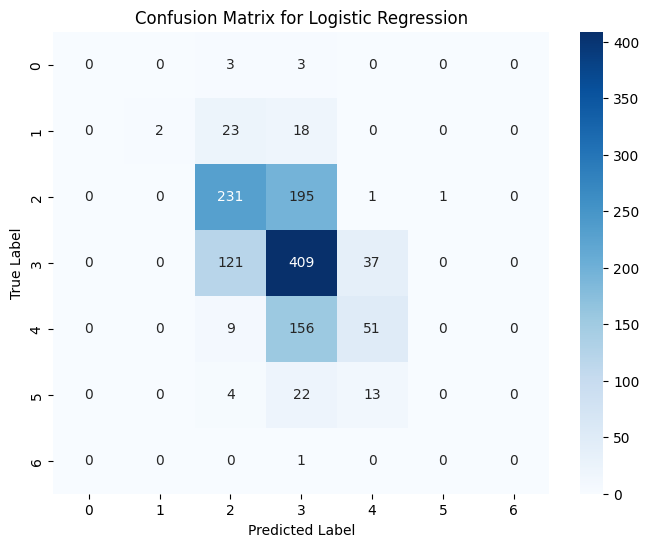

In [47]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_fe, y_train)
y_pred_lr = log_reg_model.predict(X_test_fe)

print("Results for Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:03:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.14      0.20        43
           2       0.69      0.68      0.69       428
           3       0.65      0.73      0.69       567
           4       0.63      0.58      0.60       216
           5       0.93      0.36      0.52        39
           6       0.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.46      0.36      0.38      1300
weighted avg       0.65      0.66      0.65      1300

Confusion Matrix:
[[  0   0   4   1   1   0   0]
 [  0   6  22  14   1   0   0]
 [  2   9 291 120   6   0   0]
 [  0   3  94 416  53   1   0]
 [  0   0   9  81 126   0   0]
 [  0   0   1  10  14  14   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


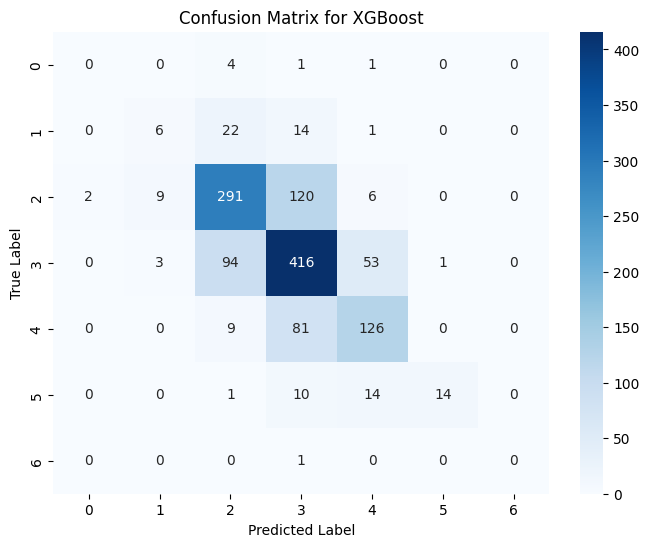

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_fe, y_train)
y_pred_xgb = xgb_model.predict(X_test_fe)

print("Results for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()